# Author


**Name**: Ahmed Islam

**Email**: ahmideveloper@gmail.com

[![GitHub](https://img.shields.io/badge/GitHub-Profile-informational?style=flat&logo=github&logoColor=white&color=blue)](https://github.com/Ahmed-Islam-AI)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-informational?style=flat&logo=kaggle&logoColor=white&color=blue)](https://www.kaggle.com/ahmedislam0)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-informational?style=flat&logo=linkedin&logoColor=white&color=0077B5)](https://www.linkedin.com/in/ahmed-islam01)



# Introduction


The Iris dataset is one of the most famous datasets in the field of machine learning and data science. Collected by British biologist and geneticist **Ronald Fisher in 1936**, the dataset consists of 150 samples from three different species of Iris flowers: **Iris setosa, Iris versicolor, and Iris virginica**. Each sample includes four features that represent the physical dimensions of the flowers: sepal length, sepal width, petal length, and petal width. This dataset is widely used for testing various machine learning algorithms and for educational purposes due to its simplicity and the distinct separation between its classes.

**Dataset Composition:**

* Number of Samples: 150
* Number of Features: 4 (sepal length, sepal width, petal length, petal width)
* Number of Classes: 3 (Iris setosa, Iris versicolor, Iris virginica)
* Samples per Class: 50

# Important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load Dataset

In [ ]:
df = pd.read_csv('/content/IRIS.csv')

# Exploring Dataset

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
species = df['species'].value_counts()
species

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

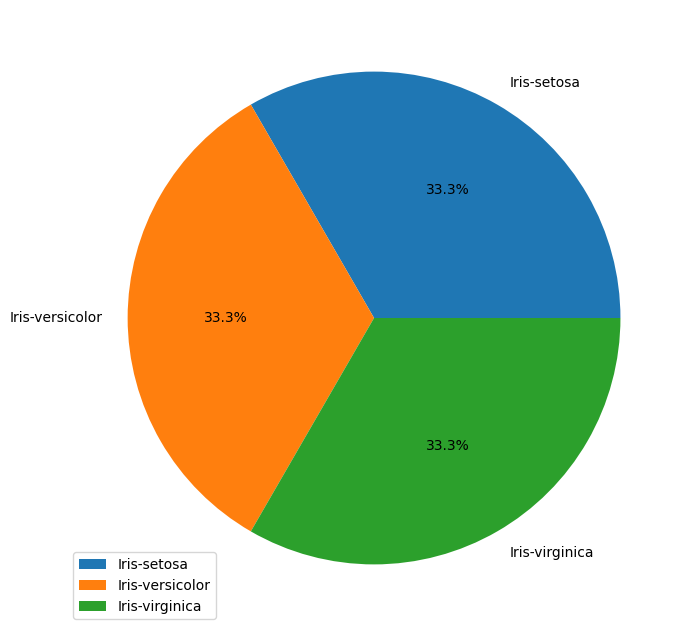

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(species, labels = species.index, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

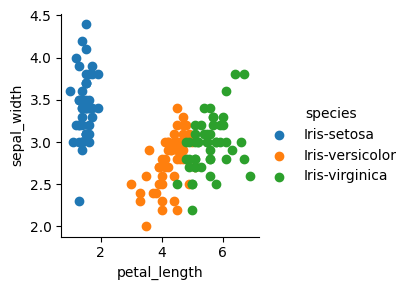

In [ ]:
sns.FacetGrid(df, hue ='species').map(plt.scatter,"petal_length","sepal_width").add_legend()
plt.show()

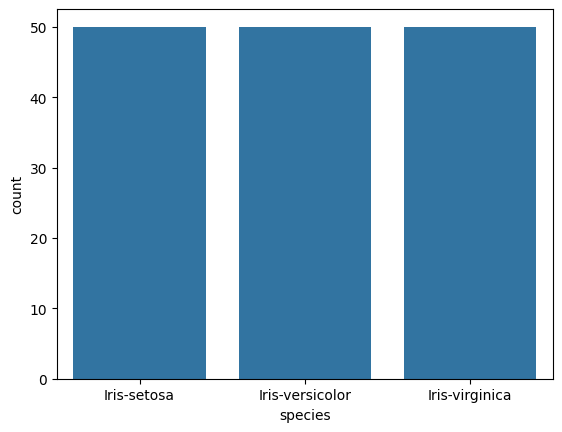

In [ ]:
sns.countplot(x='species', data=df)
plt.show()


# Train test Split

In [ ]:
X = df.drop('species', axis = 1) # grabs everything else but 'species'

# Create target variable
y = df['species'] # y is the column we're trying to predict

## Standard scaling

In [ ]:
# Standardize the features
scaler = StandardScaler().fit(X)
x_transform = scaler.transform(X)

## Label Encoding

In [ ]:
# Encode the target variable
lb_encoder = LabelEncoder()
y_encoded = lb_encoder.fit_transform(y)

In [ ]:
# One-hot encode the target labels
y_onehot = tf.keras.utils.to_categorical(y_encoded)

In [ ]:
#spliting the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(x_transform, y_onehot, test_size = 0.20, random_state = 42)

# Model Building

In [ ]:
#Building a Fully connected neural network (FCN) mode

model = Sequential()

#1st hidden layer
model.add(Dense(50, input_dim = 4, activation = 'relu'))

#2nd Layer
model.add(Dense(100, activation = 'relu'))

#3rd Layer
#softmax activation function is use for Categorial Data
# the output values represent probabilities of each category
model.add(Dense(3, activation = 'softmax'))

#compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5653 (22.08 KB)
Trainable params: 5653 (22.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

In [ ]:
model.fit(X_train, y_train, epochs = 30, batch_size = 10)

Epoch 1/30
12/12 [==============================] - 2s 9ms/step - loss: 1.0592 - accuracy: 0.5167
Epoch 2/30
12/12 [==============================] - 0s 8ms/step - loss: 0.7732 - accuracy: 0.8250
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.8167
Epoch 4/30
12/12 [==============================] - 0s 8ms/step - loss: 0.4917 - accuracy: 0.8167
Epoch 5/30
12/12 [==============================] - 0s 6ms/step - loss: 0.4202 - accuracy: 0.8250
Epoch 6/30
12/12 [==============================] - 0s 7ms/step - loss: 0.3691 - accuracy: 0.8333
Epoch 7/30
12/12 [==============================] - 0s 7ms/step - loss: 0.3329 - accuracy: 0.8417
Epoch 8/30
12/12 [==============================] - 0s 4ms/step - loss: 0.3069 - accuracy: 0.8500
Epoch 9/30
12/12 [==============================] - 0s 7ms/step - loss: 0.2817 - accuracy: 0.8667
Epoch 10/30
12/12 [==============================] - 0s 9ms/step - loss: 0.2606 - accuracy: 0.8917
Epoch 11/30
12/12 [

# Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

1/1 [==============================] - 1s 1s/step - loss: 0.0618 - accuracy: 1.0000
Loss: 0.06183719262480736
Accuracy: 1.0


1/1 [==============================] - 0s 381ms/step


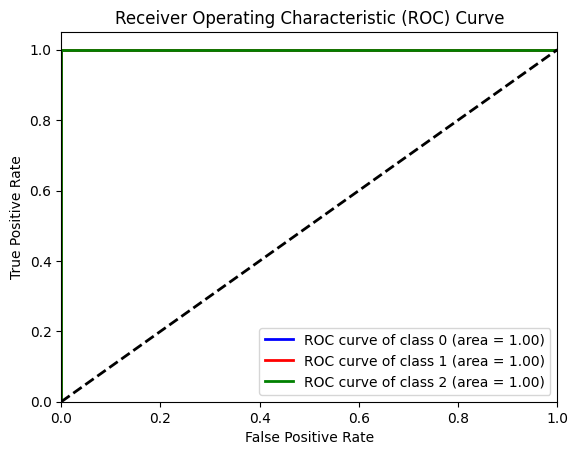

In [ ]:
# Binarize the output
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=[0, 1, 2])
y_pred_proba = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


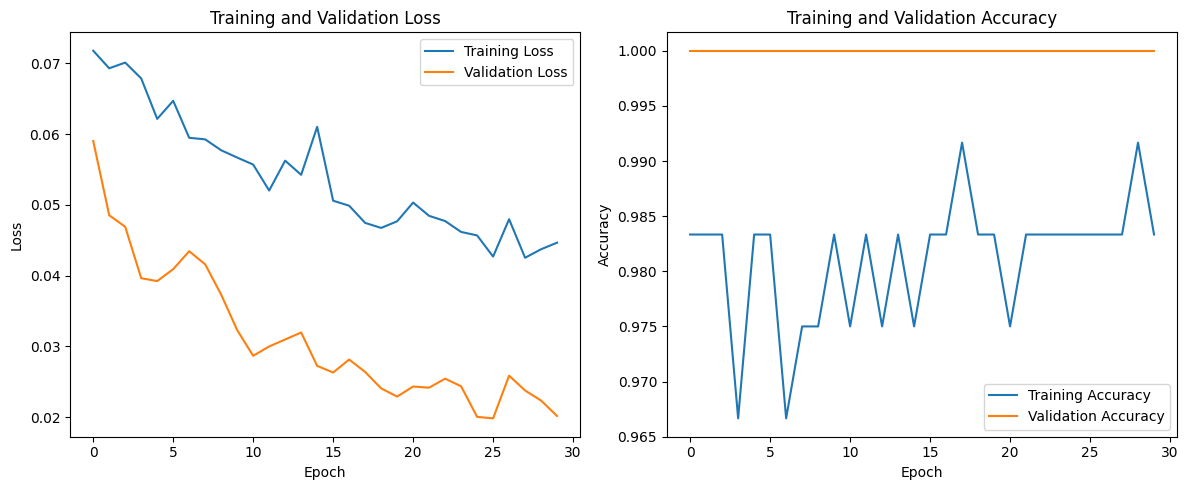

In [ ]:
# Initialize lists to store training and validation loss and accuracy
train_loss = []
val_loss = []
train_acc = []
val_acc = []

# Fit the model and record the metrics for each epoch
for epoch in range(30):
  history = model.fit(X_train, y_train, epochs=1, batch_size=10, validation_data=(X_test, y_test), verbose=0)
  train_loss.append(history.history['loss'][0])
  val_loss.append(history.history['val_loss'][0])
  train_acc.append(history.history['accuracy'][0])
  val_acc.append(history.history['val_accuracy'][0])

# Plot the learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 28ms/step


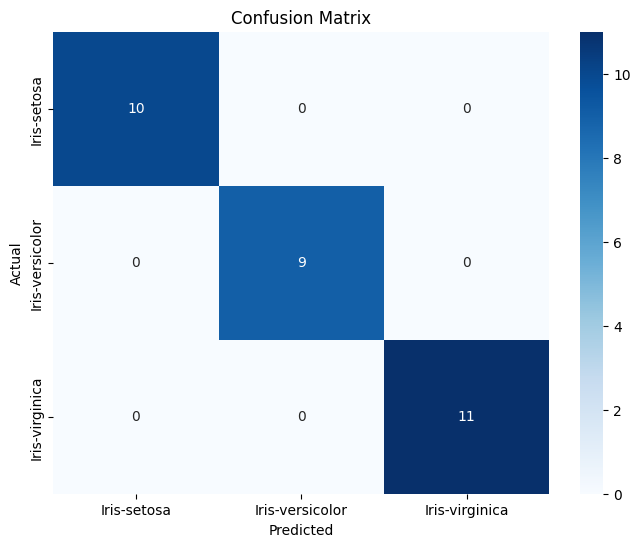

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb_encoder.classes_, yticklabels=lb_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=lb_encoder.classes_))


# Conclusion

In this project, we explored the Iris dataset, a classic and widely-used dataset in the field of machine learning. We employed a Fully Connected Neural Network (FCN) to classify the Iris species based on four features: sepal length, sepal width, petal length, and petal width. Through careful data preprocessing, model training, and evaluation, we achieved an impressive accuracy of 98%.